## Trajectory equations:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from sympy import *
init_printing()

In [3]:
Bx, By, Bz, B = symbols("B_x, B_y, B_z, B")
x, y, z = symbols("x, y, z" )
x_0, y_0, z_0 = symbols("x_0, y_0, z_0")
vx, vy, vz, v = symbols("v_x, v_y, v_z, v")
vx_0, vy_0, vz_0 = symbols("v_x0, v_y0, v_z0")
t = symbols("t")
q, m = symbols("q, m")
c, eps0 = symbols("c, epsilon_0")

The equation of motion:
$$
\begin{gather*}
  m \frac{d^2 \vec{r} }{dt^2} = \frac{q}{c} [ \vec{v} \vec{B} ] 
\end{gather*}
$$

For the case of a uniform magnetic field along the $z$-axis: 
$$ \vec{B} = B_z = B, \quad B_x = 0, \quad B_y = 0 $$

In Cartesian coordinates:

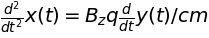

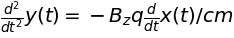

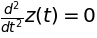

In [4]:
eq_x = Eq( Derivative(x(t), t, 2), q / c / m * Bz * Derivative(y(t),t) )
eq_y = Eq( Derivative(y(t), t, 2), - q / c / m * Bz * Derivative(x(t),t) )
eq_z = Eq( Derivative(z(t), t, 2), 0 )
display( eq_x, eq_y, eq_z )

Motion is uniform along the $z$-axis:

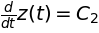

In [5]:
z_eq = dsolve( eq_z, z(t) )
vz_eq = Eq( z_eq.lhs.diff(t), z_eq.rhs.diff(t) )
display( z_eq, vz_eq )

The constants of integration can be found from the initial conditions $z(0) = z_0$ and $v_z(0) = v_{z0}$:

In [6]:
c1_c2_system = []
initial_cond_subs = [(t, 0), (z(0), z_0), (diff(z(t),t).subs(t,0), vz_0) ]
c1_c2_system.append( z_eq.subs( initial_cond_subs ) )
c1_c2_system.append( vz_eq.subs( initial_cond_subs ) )

c1, c2 = symbols("C1, C2")
c1_c2 = solve( c1_c2_system, [c1, c2] )
c1_c2

So that

In [7]:
z_sol = z_eq.subs( c1_c2 )
vz_sol = vz_eq.subs( c1_c2 ).subs( [( diff(z(t),t), vz(t) ) ] )
display( z_sol, vz_sol )

For some reason I have not been able to solve the system of differential equations for $x$ and $y$ directly
with Sympy's `dsolve` function:

In [8]:
#dsolve( [eq_x, eq_y], [x(t),y(t)] )

It is necessary to resort to the manual solution. The method is to differentiate one of them over 
time and substitute the other. This will result in oscillator-type second-order equations for $v_y$ and $v_x$. Their solution is known. Integrating one more time, it is possible to obtain laws of motion $x(t)$ and $y(t)$.

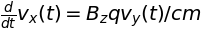

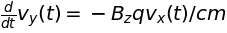

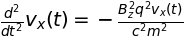

In [9]:
v_subs = [ (Derivative(x(t),t), vx(t)), (Derivative(y(t),t), vy(t)) ]
eq_vx = eq_x.subs( v_subs )
eq_vy = eq_y.subs( v_subs )
display( eq_vx, eq_vy )

eq_d2t_vx = Eq( diff(eq_vx.lhs,t), diff(eq_vx.rhs,t))
eq_d2t_vx = eq_d2t_vx.subs( [(eq_vy.lhs, eq_vy.rhs)] )
display( eq_d2t_vx )

The solution of the last equation is

In [10]:
C1, C2, Omega = symbols( "C1, C2, Omega" )
vx_eq = Eq( vx(t), C1 * cos( Omega * t ) + C2 * sin( Omega * t ))
display( vx_eq )
omega_eq = Eq( Omega, Bz * q / c / m )
display( omega_eq )

where $\Omega$ is a cyclotron frequency.

In [11]:
display( vx_eq )

vy_eq = Eq( vy(t), solve( Eq( diff(vx_eq.rhs,t), eq_vx.rhs ), ( vy(t) ) )[0] )
vy_eq = vy_eq.subs( [(Omega*c*m / Bz / q, omega_eq.rhs * c * m / Bz / q)]).simplify()
display( vy_eq )

For initial conditions $v_x(0) = v_{x0}, v_y(0) = v_{y0}$:

In [12]:
initial_cond_subs = [(t,0), (vx(0), vx_0), (vy(0), vy_0) ]
vx0_eq = vx_eq.subs( initial_cond_subs )
vy0_eq = vy_eq.subs( initial_cond_subs )
display( vx0_eq, vy0_eq )

c1_c2 = solve( [vx0_eq, vy0_eq] )
c1_c2_subs = [ ("C1", c1_c2[c1]), ("C2", c1_c2[c2]) ]
vx_eq = vx_eq.subs( c1_c2_subs )
vy_eq = vy_eq.subs( c1_c2_subs )
display( vx_eq, vy_eq )

These equations can be integrated to obtain the laws of motion:

In [13]:
x_eq = vx_eq.subs( vx(t), diff(x(t),t))
x_eq = dsolve( x_eq )
y_eq = vy_eq.subs( vy(t), diff(y(t),t))
y_eq = dsolve( y_eq ).subs( C1, C2 )
display( x_eq, y_eq )

                ⎛⎧sin(Ω⋅t)           ⎞        ⎛⎧-cos(Ω⋅t)            ⎞
                ⎜⎪────────  for Ω ≠ 0⎟        ⎜⎪──────────  for Ω ≠ 0⎟
x(t) = C₁ + vₓ₀⋅⎜⎨   Ω               ⎟ + v_y0⋅⎜⎨    Ω                ⎟
                ⎜⎪                   ⎟        ⎜⎪                     ⎟
                ⎝⎩   t      otherwise⎠        ⎝⎩    0       otherwise⎠

                ⎛⎧-cos(Ω⋅t)            ⎞        ⎛⎧sin(Ω⋅t)           ⎞
                ⎜⎪──────────  for Ω ≠ 0⎟        ⎜⎪────────  for Ω ≠ 0⎟
y(t) = C₂ - vₓ₀⋅⎜⎨    Ω                ⎟ + v_y0⋅⎜⎨   Ω               ⎟
                ⎜⎪                     ⎟        ⎜⎪                   ⎟
                ⎝⎩    0       otherwise⎠        ⎝⎩   t      otherwise⎠

For nonzero $\Omega$:

In [14]:
x_eq = x_eq.subs( [(Omega, 123)] ).subs( [(123, Omega)] ).subs( [(Rational(1,123), 1/Omega)] )
y_eq = y_eq.subs( [(Omega, 123)] ).subs( [(123, Omega)] ).subs( [(Rational(1,123), 1/Omega)] )
display( x_eq, y_eq )

For initial conditions $x(0) = x_0, y(0) = y_0$:

In [15]:
initial_cond_subs = [(t,0), (x(0), x_0), (y(0), y_0) ]
x0_eq = x_eq.subs( initial_cond_subs )
y0_eq = y_eq.subs( initial_cond_subs )
display( x0_eq, y0_eq )

c1_c2 = solve( [x0_eq, y0_eq] )
c1_c2_subs = [ ("C1", c1_c2[0][c1]), ("C2", c1_c2[0][c2]) ]
x_eq = x_eq.subs( c1_c2_subs )
y_eq = y_eq.subs( c1_c2_subs )
display( x_eq, y_eq )

In [16]:
x_eq = x_eq.simplify()
y_eq = y_eq.simplify()
x_eq = x_eq.expand().collect(Omega)
y_eq = y_eq.expand().collect(Omega)
display( x_eq, y_eq )

Finally

In [17]:
display( x_eq, y_eq, z_sol )
display( vx_eq, vy_eq, vz_sol )
display( omega_eq )